In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
df = pd.read_csv('clustered dataset.csv')
df.head()

,Unnamed: 0,Cluster_numbers,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,3,1,1,19,15,39
1,1,3,2,1,21,15,81
2,2,3,3,0,20,16,6
3,3,3,4,0,23,16,77
4,4,3,5,0,31,17,40


In [8]:
df['Gender'] = df['Gender'].map({'Female': '0', 'Male': '1'})
print(df)

     Unnamed: 0  Cluster_numbers  CustomerID Gender  Age  Annual Income (k$)  \
0             0                3           1    NaN   19                  15   
1             1                3           2    NaN   21                  15   
2             2                3           3    NaN   20                  16   
3             3                3           4    NaN   23                  16   
4             4                3           5    NaN   31                  17   
..          ...              ...         ...    ...  ...                 ...   
195         195                2         196    NaN   35                 120   
196         196                0         197    NaN   45                 126   
197         197                2         198    NaN   32                 126   
198         198                0         199    NaN   32                 137   
199         199                2         200    NaN   30                 137   

     Spending Score (1-100)  
0        

In [9]:
df.shape

(200, 7)

In [10]:
df.columns

Index(['Unnamed: 0', 'Cluster_numbers', 'CustomerID', 'Gender', 'Age',
       'Annual Income (k$)', 'Spending Score (1-100)'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              200 non-null    int64 
 1   Cluster_numbers         200 non-null    int64 
 2   CustomerID              200 non-null    int64 
 3   Gender                  0 non-null      object
 4   Age                     200 non-null    int64 
 5   Annual Income (k$)      200 non-null    int64 
 6   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 11.1+ KB


In [13]:
df.select_dtypes(include = ['int64', 'float64']).columns

Index(['Unnamed: 0', 'Cluster_numbers', 'CustomerID', 'Age',
       'Annual Income (k$)', 'Spending Score (1-100)'],
      dtype='object')

In [14]:
df.describe()
df.isnull().values.any()

True

In [20]:
import seaborn as sns
sns.pairplot(df)

In [16]:
df.head()

,Unnamed: 0,Cluster_numbers,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,3,1,NaN,19,15,39
1,1,3,2,NaN,21,15,81
2,2,3,3,NaN,20,16,6
3,3,3,4,NaN,23,16,77
4,4,3,5,NaN,31,17,40


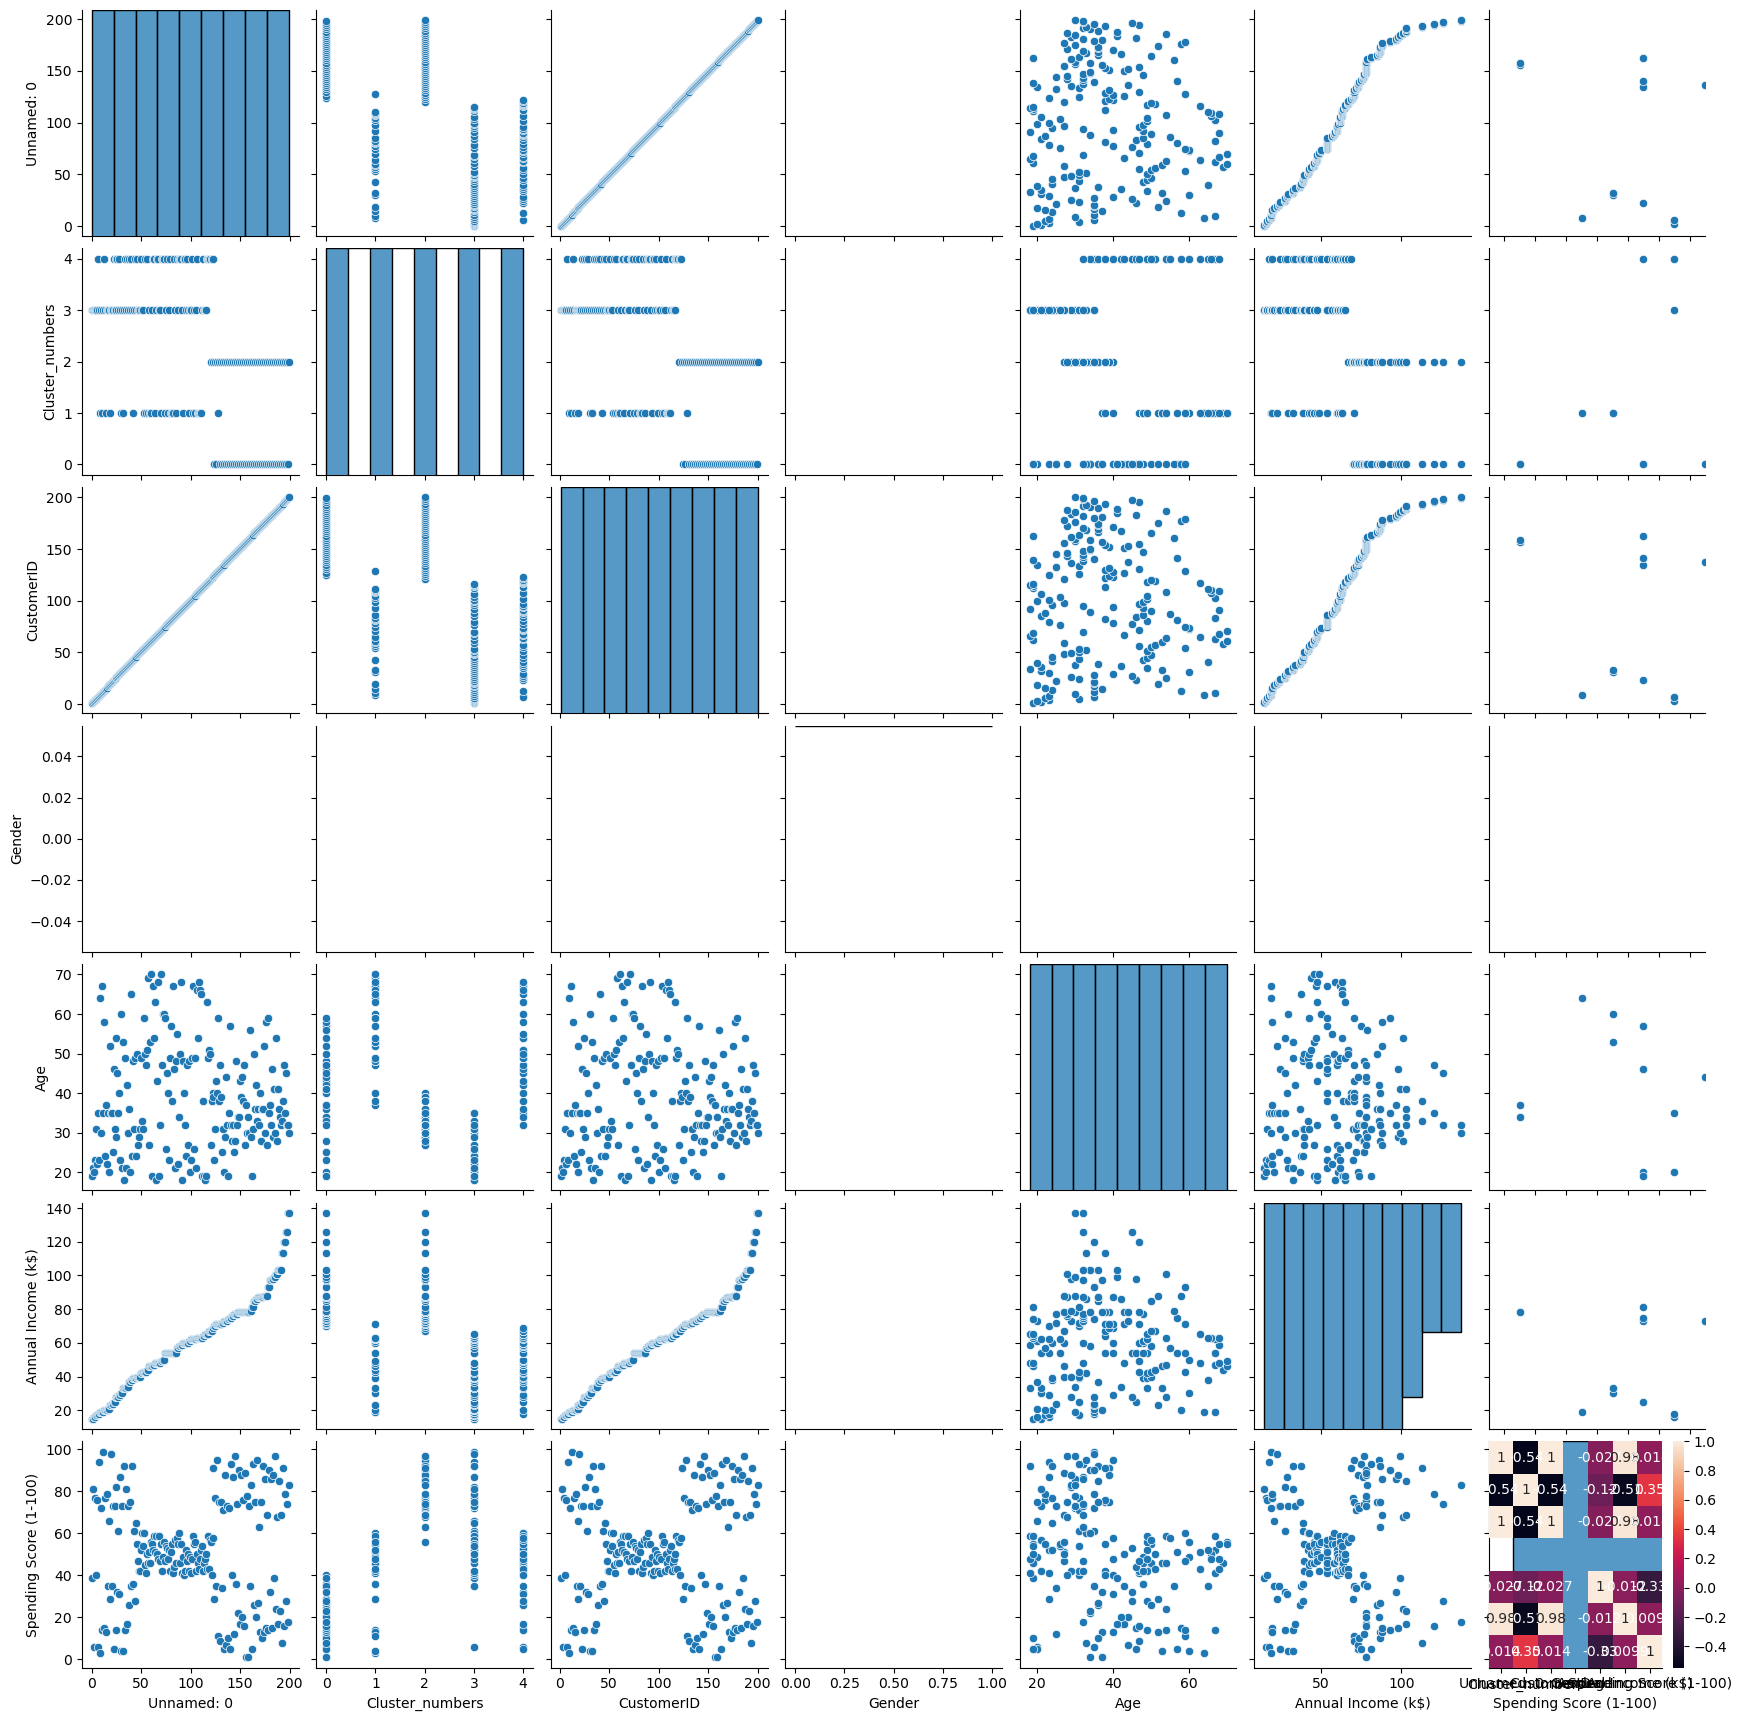

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.corr(), annot = True)
plt.show()

In [21]:
dataframe = df

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset = sc.fit_transform(df)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [23]:
df

,Unnamed: 0,Cluster_numbers,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,3,1,NaN,19,15,39
1,1,3,2,NaN,21,15,81
2,2,3,3,NaN,20,16,6
3,3,3,4,NaN,23,16,77
4,4,3,5,NaN,31,17,40
...,...,...,...,...,...,...,...
195,195,2,196,NaN,35,120,79
196,196,0,197,NaN,45,126,28
197,197,2,198,NaN,32,126,74
198,198,0,199,NaN,32,137,18


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Gender']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avail

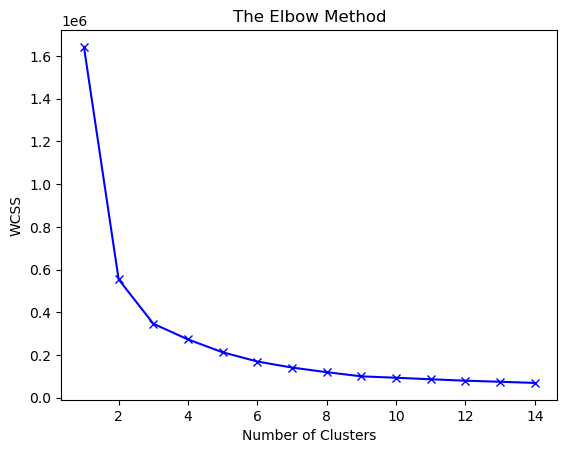

In [27]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'dataset' is a pandas DataFrame
imputer = SimpleImputer(strategy='mean')
dataset_imputed = imputer.fit_transform(df)

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(dataset_imputed)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
imputer = SimpleImputer(strategy='mean') 
dataset_imputed = imputer.fit_transform(df) 
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(dataset_imputed) 

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Gender']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
y_kmeans

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4,
       4, 4])

In [30]:
y_kmeans = y_kmeans.reshape(len(y_kmeans), 1)
bx = np.concatenate((y_kmeans, dataframe), axis = 1)
dataframe.columns

Index(['Unnamed: 0', 'Cluster_numbers', 'CustomerID', 'Gender', 'Age',
       'Annual Income (k$)', 'Spending Score (1-100)'],
      dtype='object')

In [31]:
# Assuming 'dataframe' has the columns 'CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)' and two more columns
dataframe_final = pd.DataFrame(data = bx, columns = ['Cluster_numbers','CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Extra Column 1', 'Extra Column 2'])

In [32]:
dataframe_final.head()

,Cluster_numbers,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Extra Column 1,Extra Column 2
0,3,0,3,1,NaN,19,15,39
1,3,1,3,2,NaN,21,15,81
2,3,2,3,3,NaN,20,16,6
3,3,3,3,4,NaN,23,16,77
4,3,4,3,5,NaN,31,17,40


In [33]:
dataframe_final.to_csv('clustered dataset')

In [34]:

dataframe_final.head()

,Cluster_numbers,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Extra Column 1,Extra Column 2
0,3,0,3,1,NaN,19,15,39
1,3,1,3,2,NaN,21,15,81
2,3,2,3,3,NaN,20,16,6
3,3,3,3,4,NaN,23,16,77
4,3,4,3,5,NaN,31,17,40
